# Exercise set 4

> This exercise aims to show you how to perform **least squares regression** 
> for real experimental data. In the first part, we will use data that
> contains uncertainties, and we are going 
> to make use of this in the fitting and for estimating errors in
> the fitted parameter.
> In the second part, we will use testing/training to estimate
> what kind of errors we can expect when using a model for estimation.

## Exercise 4.1

In this exercise we will use least-squares regression to investigate a physical phenomenon: the decay of
beer froth with time. The file [Data/erdinger.csv](Data/erdinger.csv)
contains [measured heights](https://doi.org/10.1088/0143-0807/23/1/304) for beer
froth as a function of time, along with the errors in the measured heights.

Arnd Leike was awarded the 2002 [Ig Nobel prize](https://en.wikipedia.org/wiki/Ig_Nobel_Prize) for this work. In
the [original study](https://doi.org/10.1088/0143-0807/23/1/304), Leike reported data
for two more beers. The data for these two are in the
files [Data/augustinerbrau.csv](Data/augustinerbrau.csv) and [Data/budweiser.csv](Data/budweiser.csv).
If you have extra time, you can try to redo [4.1(d)](#4.1(d)) also for these two beers.

### 4.1(a)
Create a linear model for the beer froth height as a function of time using least squares.
Plot your model with the raw data, calculate the coefficient of determination, $R^2$ , and plot
the residuals. What do you think about your model?

In [2]:
# Here is some code to get you started:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  # Styling of plots

%matplotlib inline
sns.set_theme(style="ticks", context="notebook", palette="muted")

data = pd.read_csv("Data/erdinger.csv")
data

,time,height,height-error
0,0,17.0,0.0
1,15,16.1,0.3
2,30,14.9,0.4
3,45,14.0,0.4
4,60,13.2,0.4
5,75,12.5,0.6
6,90,11.9,0.4
7,105,11.2,0.4
8,120,10.7,0.4
9,150,9.7,0.4


In [3]:
# In this exercise, you are encouraged to try sklearn
# and its LinearRegression method:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Here is an example on how to use it:

# First, we create the model:
model = LinearRegression(fit_intercept=True)

# Next, set up the x and y data.

X = data["time"].to_numpy().reshape(-1, 1)
y = data["height"].to_numpy()

# The data from pandas is converted to a
# numpy array with to_numpy(). The data is then reshaped
# with reshape(-1, 1). This is to convert X into a matrix
# and not just a vector. sklearn assumes in general that the input
# X is a matrix, so for 1D cases, we often have to add a reshape
# operation like the one below.

# Also note that we do not add a column of ones to X.
# We have already said fit_intercept=True above and
# it will then be added automatically.

# To fit the model, give it both X and y:
model.fit(X, y)
# To show the coefficients:
print(model.intercept_, model.coef_)
# To use the model for predicting something:
y_hat = model.predict(X)
# To calculate R²:
r2 = model.score(X, y)
# or:
r2 = r2_score(y, y_hat)
print("R² =", r2)

15.393952967525198 [-0.0320754]
R² = 0.9437236290681245


<ErrorbarContainer object of 3 artists>

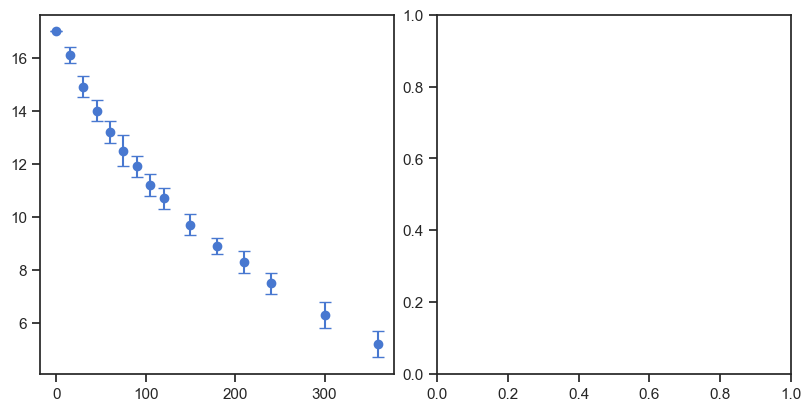

In [4]:
# And here is a hint for the plottUing:
# Since the raw data contains errors, it is nice to
# visualize them as error bars:
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
ax1.errorbar(
    data["time"],
    data["height"],
    yerr=data["height-error"],
    label="Raw data",
    fmt="o",  # Just show the symbols and no lines
    capsize=4,  # Size of end of the error bars
)

In [ ]:
# Your code here

### Answer to question 4.1(a): "What do you think about your model?"
*Double click here*

### 4.1(b)
If we assume that the change in froth volume is proportional
to the volume present at any given time, we can show that we get
exponential decay of the froth height,

\begin{equation}
\frac{h(t)}{h(0)} = \exp \left(-\frac{t}{\tau} \right),
\end{equation}

where $h(t)$ is the height of the froth as a function of time $t$, and $\tau$ is a parameter.
We will assume that $h(0)$ is a known parameter equal to the height of the froth at the initial time.

Show how you can transform the equation above to a linear equation of the form,

\begin{equation}
y = b x,
\end{equation}

and express $b, x, y$ in terms of $h, h(0), t, \tau$.

**Note:** The equation $y=bx$ does not include the usual constant term.
This will modify the least squares equation as shown in [Appendix A](#A.-Least-squares-without-the-intercept)
You can use the equation from the appendix to calculate $b$ in the following or (recommended!)
make use of methods where you can turn off the intercept, for instance
[``LinearRegression(fit_intercept=False)``](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

### Answer to question 4.1(b):
*Double click here*

### 4.1(c)
Use the transformation you found above to create a new linear model where you estimate
the value of $\tau$. Plot your new model together with the raw data and calculate $R^2$.

In [ ]:
# Your code here

### Answer to question 4.1(c): What value did you get for $\tau$?
*Double click here*

### 4.1(d)
[Leike](https://doi.org/10.1088/0143-0807/23/1/304) found a
value of $\tau = 276$ s which is probably lower than the
value you found in the previous task.
We will now try to reproduce the results of Leike, but to
do that, we have to do weighted least squares.

As you have seen,
the raw data includes errors that are not constant. We can use
these errors to give weights to the data points in the fitting:
we give more importance
to points with smaller errors and less importance to points with larger errors.

One way forward is to assign weights ($w_i$) as $w_i = 1/\sigma_i^2$ where $\sigma_i$ is the
reported error for observation $i$. But we need to consider the fact that we
are now fitting to $y = \log (h(t) / h(0))$, and this will also modify the errors.
If you remember [propagation of errors](https://en.wikipedia.org/wiki/Propagation_of_uncertainty),
you should be able to show that $\sigma_y^2 = \sigma_h^2 / h^2$, and this is
the transformation we need.

Do the following steps to perform the weighted
least squares:
* (i) Calculate errors for your $y$ values according to $\sigma_y^2 = \sigma_{h}^2 / h^2$.

* (ii) Calculate weights for your $y$ values as $w = 1/\sigma_y^2$. Note: If
  a $\sigma_y$ value is zero, set the corresponding weight to zero.
  
* (iii) Run a weighted least squares fitting using your $w$'s as weights (see the Jupyter notebook version
  for more hints), and find $\tau$. Plot your new model and calculate $R^2$.

In [ ]:
# Example on how to run weighted least squares:
model = LinearRegression(fit_intercept=False)
# Just create some weights (not correct for 4.1(d))
weights = 1.0 / data["height-error"].to_numpy() ** 2
weights[weights == float("inf")] = 0  # Set infinite values to zero
model.fit(X, y, sample_weight=weights)  # Do fitting, but use the weights
r2 = model.score(
    X, y, sample_weight=weights
)  # Calculate R² (considering the weights).

In [ ]:
# Your code here

### Answer to question 4.1(d): What value did you get for $\tau$?
*Double click here*

### 4.1(e)
Since we do have measured errors here, we can use them to estimate the error in the
parameter you just found. For a weighted least squares fit to the equation $y = bx$,
the error estimate ($\sigma_b$) for $b$ is,

\begin{equation}
\sigma_b^2 = \frac{1}{\sum_{i=1}^n w_i x_i^2} .
\end{equation}

Estimate the error for the $\tau$-value you just found.

In [ ]:
# Your code here

### Answer to question 4.1(e): What boundaries ($\pm$) did you get for $\tau$?
*Double click here*

## Exercise 4.2

[Forbes](https://doi.org/10.1017/S0080456800032075) investigated the
relationship between the boiling point of water and
the atmospheric pressure, and collected data in the Alps and Scotland.
Forbes' goal
was to estimate altitudes from the boiling point alone. We will see if we can
estimate the atmospheric pressure from Forbes' data.

### 4.2(a) 
Load the data from Forbes (data file [Data/forbes.csv](Data/forbes.csv)), plot it,
and create a linear model
that predicts the atmospheric pressure from the temperature. Report the R² and [mean
squared error (MSE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) for your model.

In [ ]:
# Note: sklearn has a method for the MSE:
from sklearn.metrics import mean_squared_error

In [ ]:
# Your code here

### Answer to question 4.2(a): What R² did you get and what was the MSE?
*Double click here*

### 4.2(b) 

Estimate the error you can expect to make if you use your model for predicting the pressure.
Do this by Leave-one-out cross-validation (LOOCV) and calculate the mean squared error
of cross-validation ($\text{MSE}_\text{CV}$)

LOOCV is a special case of **training** and **testing**, and you can find a short description of it
in [appendix B](#B.-Leave-one-out-cross-validation). Please see the Jupyter notebook for a code example you can use. The code
example for LOOCV is concise, so make sure you understand what goes on here (that is,
what LOOCV is doing). If you are working with someone, try explaining testing/training
and how LOOCV works to them.

In [ ]:
# Example 1 of LOOCV:
# sklearn has a method to pick out samples for leave-one-out:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
# To split into training and testing, we can use loo.split()
error = []
for train_index, test_index in loo.split(X):
    # train_index = index of samples to use for training
    # test_index = index of samples to use for testing
    # Pick out samples (for training and testing):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Fit a new model with the training set:
    model = LinearRegression(fit_intercept=True).fit(X_train, y_train)
    # Predict y for the test set:
    y_hat = model.predict(X_test)
    # Compare the predicted y values in the test set with the measured ones:
    error.append((y_test - y_hat) ** 2)
mse_cv_1 = np.mean(error)

In [ ]:
# Example 2 of LOOCV:
# sklearn has a method for leave-one-out selection, and a method for
# cross-validation. And these two can be combined:
from sklearn.model_selection import LeaveOneOut, cross_val_score

# Create "empty" model for fitting:
model = LinearRegression(fit_intercept=True)
# Run cross validation, where we select testing and
# training with LeaveOneOut:
scores = cross_val_score(
    model, X, y, scoring="neg_mean_squared_error", cv=LeaveOneOut()
)
mse_cv_2 = np.mean(-scores)

**Note:** The scoring is `"neg_mean_squared_error"` above, which is the negative of the mean squared error. This is maybe schematics, but many methods in sklearn return a "score", and for most of us, a better score = a better result. So if we used the mean squared error as the score, then a larger score = a larger error = a poorer result. However, with the negative sign, a larger score (closer to zero) = smaller error = better result.

In [ ]:
# Your code here (if needed).

### Answer to question 4.2(b): What $\text{MSE}_\text{CV}$ did you get?
*Double click here*

# Appendix

## A. Least squares without the intercept
We are going to determine the parameter $b$ for the linear model,

\begin{equation}
y =  b x,
\end{equation}

and we do this by minimizing the sum of squared errors (assuming that we have $n$
measurements of $y$ and $x$),

\begin{equation}
S = \sum_{i=1}^n (y_i - b x_i)^2.
\end{equation}

We have:

\begin{equation*}
\frac{\partial S}{\partial b} = -2 \sum_{i=1}^n r_i x_i, \quad
\frac{\partial^2 S}{\partial b^2} = 2\sum_{i=1}^n x_i^2 \geq 0,
\end{equation*}

Note that the second derivative is positive, except for the
trivial case when $x_i = 0$, and we are indeed going to
find a minimum.
Requiring that $\frac{\partial S}{\partial b} = 0$ gives,

\begin{equation}
-2 \sum_{i=1}^n r_i x_i = 0 \implies \sum_{i=1}^n (y_i x_i - b x_i^2) = 0 \implies 
b = \frac{\sum_{i=1}^n y_i x_i}{\sum_{i=1}^n x_i^2} .
\end{equation}

We can also repeat this derivation for weighted least squares. The sum of squared errors
is then,

\begin{equation}
S = \sum_{i=1}^n w_i (y_i - b x_i)^2,
\end{equation}

where $w_i$ are the weights and, after minimization,

\begin{equation}
b = \frac{\sum_{i=1}^n w_i y_i x_i}{\sum_{i=1}^n w_i x_i^2} .
\end{equation}

You can find more information on the weighted least squares method (with error analysis)
in Bevington and Robinson <a name="cite_ref-1"></a>[[1]](#bevington).
Taylor <a name="cite_ref-2"></a>[[2]](#taylor) states error formulas for
the parameters that might be useful for cases when
the error in $y$ is known and constant (e.g., as in the ``normal'' least squares).


<a name="bevington"></a>[[1]](#cite_ref-1) Philip R. Bevington and D. Keith Robinson. Data reduction and error analysis for the physical sciences. 3rd ed. New York, NY: McGraw-Hill, 2003.

<a name="taylor"></a>[[2]](#cite_ref-2) John R. Taylor. An Introduction to Error Analysis: The Study of Uncertainties in Physical
    Measurements. 2nd ed. Sausalito, CA: University Science Books, 1997.


## B. Leave-one-out cross-validation

In Leave-one-out cross-validation (LOOCV), we first pick one sample,
measurement number $j$, and we fit the model using the $n-1$ other points
(all points except $j$). After the fitting, we check how well the model can predict
measurement $j$ by calculating the difference between the
measured ($y_j$) and predicted ($\tilde{y}_j$) value. This difference, $r_j = y_{j} - \tilde{y}_j$, is
called the predicted residual, and it tells us the error we just made.

There is nothing special about picking point $j$, and we can try all possibilities
of leaving one point out, fitting the model using the remaining $n-1$
measurements, and predicting the value we left out.
After doing this for all possibilities, we have fitted the model
$n$ times and calculated $n$ predicted residuals. The mean squared error (obtained from the squared
residuals), $\mathrm{MSE}_{\mathrm{CV}}$, can then be used
to estimate the error in the model,

\begin{equation}
\mathrm{MSE}_{\mathrm{CV}} = \frac{1}{n} \sum_{i=1}^{n} r_i^2 =  \frac{1}{n} \sum_{i=1}^{n} (y_i - \tilde{y}_i)^2,
\end{equation}

where $y_i$ is the measured $y$ in experiment $i$, and $\tilde{y}_i$ is the
predicted $y$, using a model which was fitted using all points *except* $y_i$.

For a polynomial fitting, there is an alternative to refitting the model $n$ times. In fact,
we can show that for polynomial fitting, the mean squared error can
be obtained by,

\begin{equation}
\mathrm{MSE}_{\mathrm{CV}} = \frac{1}{n}\sum_{i=1}^{n} (y_i - \tilde{y}_i)^2 =
\frac{1}{n}\sum_{i=1}^{m} \left(\frac{y_i - \hat{y}_i}{1 - h_{ii}} \right)^2,
\end{equation}

where the $\hat{y}_i$'s are predicted values using the
model fitted with *all data points*,
and $h_{ii}$ is the $i$'th diagonal element of the
$\mathbf{H}$ matrix (the projection matrix,
see Eq.(4.49) on page 49 in our textbook),

\begin{equation}
\mathbf{H} =
\mathbf{X} 
\left( 
  \mathbf{X}^\mathrm{T} \mathbf{X}
\right)^{-1}
\mathbf{X}^\mathrm{T} = \mathbf{X} \mathbf{X}^+,
\end{equation}

Note the difference between $\hat{y}_i$ and $\tilde{y}_i$, and the
fact that we  do not have to do the
refitting(!) to obtain the $\mathrm{MSE}_{\mathrm{CV}}$.

When you calculate $\mathrm{MSE}_{\mathrm{CV}}$, use one of the two approaches above or both
if you want to see if they give the same answer.